# Missing Data

Let's show a few convenient methods to deal with Missing Data in pandas:

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Importing Data
data = pd.read_csv("Data.csv")

In [3]:
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,NaN,NaN,NaN
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,NaN,NaN,NaN
9,France,37.0,67000.0,Yes


## Finding Missing Values

### data.isnull()

Detect missing values and Returns boolean array.


In [4]:
data.isnull()

,Country,Age,Salary,Purchased
0,False,False,False,False
1,False,False,False,False
2,False,True,True,True
3,False,False,False,False
4,False,False,True,False
5,False,False,False,False
6,False,True,False,False
7,False,False,False,False
8,False,True,True,True
9,False,False,False,False


In [5]:
data.isna()

,Country,Age,Salary,Purchased
0,False,False,False,False
1,False,False,False,False
2,False,True,True,True
3,False,False,False,False
4,False,False,True,False
5,False,False,False,False
6,False,True,False,False
7,False,False,False,False
8,False,True,True,True
9,False,False,False,False


### data.notnull()

Detect existing (non-missing) values.opposite of isnull

In [6]:
data.notnull()

,Country,Age,Salary,Purchased
0,True,True,True,True
1,True,True,True,True
2,True,False,False,False
3,True,True,True,True
4,True,True,False,True
5,True,True,True,True
6,True,False,True,True
7,True,True,True,True
8,True,False,False,False
9,True,True,True,True


In [7]:
data.isnull().sum() # Column wise total missing values in a DataFrame

Country      0
Age          3
Salary       3
Purchased    2
dtype: int64

In [9]:
import seaborn as sns

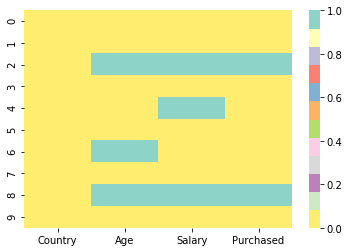

In [14]:
sns.heatmap(data.isnull(),cmap='Set3_r')

## Filling Missing Values

### data.fillna()

Fill NA/NaN values using the specified method

In [15]:
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,NaN,NaN,NaN
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,NaN,NaN,NaN
9,France,37.0,67000.0,Yes


**1.  Filling Missing Values with `0`**

In [16]:
data.fillna(value=0) 

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,0.0,0.0,0
3,Spain,38.0,61000.0,No
4,Germany,40.0,0.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,0.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,0.0,0.0,0
9,France,37.0,67000.0,Yes


**2. Filling Missing values based on Columns**

In [18]:
age_mean = data['Age'].mean()
salary_mean = data['Salary'].mean()
data['Purchased'].value_counts()
purchased_mode = 'Yes'

In [19]:
value={"Age":age_mean,
       "Salary":salary_mean, 
       "Purchased":purchased_mode}

data.fillna(value)

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,38.428571,62428.571429,Yes
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,62428.571429,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.428571,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,38.428571,62428.571429,Yes
9,France,37.000000,67000.000000,Yes


**3. Filling Missing Values by `Method`**

In [20]:
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,NaN,NaN,NaN
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,NaN,NaN,NaN
9,France,37.0,67000.0,Yes


In [21]:
data.fillna(method="ffill") # Copy previous values

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,27.0,48000.0,Yes
3,Spain,38.0,61000.0,No
4,Germany,40.0,61000.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,35.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,48.0,79000.0,Yes
9,France,37.0,67000.0,Yes


In [22]:
data.fillna(method="bfill") # copy next value

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,38.0,61000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,58000.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,48.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,37.0,67000.0,Yes
9,France,37.0,67000.0,Yes


### Filling Missing Values using `Interpolate`

Interpolate values according to different methods.

`data.interpolate(method = )`

method : {'linear', 'time', 'index', 'values', 'nearest', 'zero',
          'slinear', 'quadratic', 'cubic', 'barycentric', 'krogh',
          'polynomial', 'spline', 'piecewise_polynomial',
          'from_derivatives', 'pchip', 'akima'}

In [24]:
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,NaN,NaN,NaN
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,NaN,NaN,NaN
9,France,37.0,67000.0,Yes


In [23]:
data.interpolate(method='linear')

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,32.5,54500.0,NaN
3,Spain,38.0,61000.0,No
4,Germany,40.0,59500.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,41.5,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,42.5,73000.0,NaN
9,France,37.0,67000.0,Yes


In [25]:
data.interpolate(method = 'nearest')

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,27.0,48000.0,NaN
3,Spain,38.0,61000.0,No
4,Germany,40.0,61000.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,35.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,48.0,79000.0,NaN
9,France,37.0,67000.0,Yes


### Drop Missing Values

Remove missing values.

`DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)`

- axis : {0 or ‘index’, 1 or ‘columns’}, default 0
- how : {‘any’, ‘all’}, default ‘any’
    - ‘any’ : If any NA values are present, drop that row or column.
    - ‘all’ : If all values are NA, drop that row or column.
- thresh : int, optional.Require that many non-NA values.

In [26]:
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,NaN,NaN,NaN
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,NaN,NaN,NaN
9,France,37.0,67000.0,Yes


In [27]:
data.dropna(axis=0,how='any') # Drop entier row if there is one missing value.

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
3,Spain,38.0,61000.0,No
5,France,35.0,58000.0,Yes
7,France,48.0,79000.0,Yes
9,France,37.0,67000.0,Yes


In [29]:
data['Country']

0     France
1      Spain
2    Germany
3      Spain
4    Germany
5     France
6      Spain
7     France
8    Germany
9     France
Name: Country, dtype: object

In [28]:
data.dropna(how='all') # Drop entier row if the entier row having a missing values.

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,NaN,NaN,NaN
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,NaN,NaN,NaN
9,France,37.0,67000.0,Yes


In [34]:
data.dropna(thresh=2) # Keep only the rows with at least 2 non-NA values.

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
9,France,37.0,67000.0,Yes


In [35]:
# Define in which columns to look for missing values.
data.dropna(subset=['Age','Salary'])

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
3,Spain,38.0,61000.0,No
5,France,35.0,58000.0,Yes
7,France,48.0,79000.0,Yes
9,France,37.0,67000.0,Yes
